### Аналитика в Яндекс.Афише
___
##### Мы проходим стажировку в Яндекс.Афише. В качестве первого задания необходимо помочь маркетологам оптимизировать маркетинговые затраты. В нашем распоряжении следующие данные с июня 2017 по май 2018 года: лог сервера с данными о посещениях сайта Яндес.Афиши, выгрузка всех заказов за этот период, статистика рекламных расходов. 

___
###### Данное исследование разделим на несколько шагов. 

#### Шаг 1. Загрузка данных, изучение общей информации, подготовка данных: 
* [1.1. Загрузка библиотек, открытие и сохранение файла](#1-bullet)
* [1.2. Получение и рассмотрение общей информации о таблице](#2-bullet)
* [1.3. Проверка типов данных в таблицах](#3-bullet)

#### Шаг 2. Построение отчетов и подсчет метрик:
  
##### Продукт  
* [2.1. Сколько людей пользуются в день, неделю, месяц?](#4-bullet)
* [2.2. Сколько сессий в день?](#5-bullet)
* [2.3. Сколько длится одна сессия?](#6-bullet)
* [2.4. Как часто люди возвращаются?](#7-bullet)  
  
##### Продажи  
* [2.5. Когда люди начинают покупать?](#8-bullet)
* [2.6. Сколько раз покупают за период?](#9-bullet)
* [2.7. Какой средний чек?](#10-bullet)
* [2.8. Сколько денег приносят? (LTV)](#11-bullet)  
  
##### Маркетинг  
* [2.9. Сколько денег потратили? Всего / на каждый источник / по времени](#12-bullet)
* [2.10. Сколько стоило привлечение одного покупателя из каждого источника?](#13-bullet)
* [2.11. На сколько окупились расходы? (ROI)](#14-bullet)

#### Шаг 3. Общий вывод:
* [3.1. Рекомендации маркетологам](#15-bullet)

### Шаг 1. Откроем файлы с данными и изучим общую информацию

<a id='1-bullet'></a>
#### 1.1. Загрузим библиотеки, откроем и сохраним файлы

In [1]:
# импортируем необходимые библиотеки
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns

# открываем и сохраняем файлы
visits = pd.read_csv('/datasets/visits_log.csv')
orders = pd.read_csv('/datasets/orders_log.csv')
costs = pd.read_csv('/datasets/costs.csv')

<a id='2-bullet'></a>
#### 1.2. Рассмотрим общую информацию о таблицах

In [2]:
# рассмотрим общую информацию о таблице visits
visits.info()
visits.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [3]:
# переименуем названия столбцов
visits.columns=['device','end_ts','source_id','start_ts','uid']

In [4]:
# проверим таблицу visits на дубликаты
visits.duplicated().sum()

0

In [5]:
# рассмотрим общую информацию о таблице orders
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [6]:
# переименуем названия столбцов
orders.columns=['buy_ts','revenue','uid']

In [7]:
# проверим таблицу orders на дубликаты
orders.duplicated().sum()

0

In [8]:
# рассмотрим общую информацию о таблице costs
costs.info()
costs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [9]:
# проверим таблицу costs на дубликаты
costs.duplicated().sum()

0

<a id='3-bullet'></a>
#### 1.3. Проверка типов данных в таблицах

In [10]:
# проверим типы данных в таблицах
for column in [visits, orders, costs]:
    print(column.dtypes)
    print()

device       object
end_ts       object
source_id     int64
start_ts     object
uid          uint64
dtype: object

buy_ts      object
revenue    float64
uid         uint64
dtype: object

source_id      int64
dt            object
costs        float64
dtype: object



Переведем во всех таблицах столбцы с датами в соответствующий формат.

In [11]:
# преобразуем необходимые столбцы в формат даты
visits['end_ts']=pd.to_datetime(visits['end_ts'])
visits['start_ts']=pd.to_datetime(visits['start_ts'])
orders['buy_ts']=pd.to_datetime(orders['buy_ts'])
costs['dt']=pd.to_datetime(costs['dt'])

Изучили общую информацию о данных, изменили названия столбцов, перевели столбцы с датами в соответствующий формат. Теперь можем переходить к анализу данных. 

### Шаг 2. Построение отчетов и подсчет метрик

##### Продуктовые метрики:

<a id='4-bullet'></a>
#### 2.1. Сколько людей пользуются в день, неделю, месяц?

In [12]:
# выделим в отдельные столбцы год, неделю, месяц и полную дату
visits['year']=visits['start_ts'].dt.year
visits['day']=visits['start_ts'].dt.date
visits['week']=visits['start_ts'].dt.week
visits['month']=visits['start_ts'].dt.month

In [13]:
# посчитаем метрики
dau_total = visits.groupby('day').agg({'uid':'nunique'}).mean()
wau_total = visits.groupby(['year','week']).agg({'uid':'nunique'}).mean()
mau_total = visits.groupby(['year','month']).agg({'uid':'nunique'}).mean()

In [14]:
print(int(dau_total))
print(int(wau_total))
print(int(mau_total))

907
5716
23228


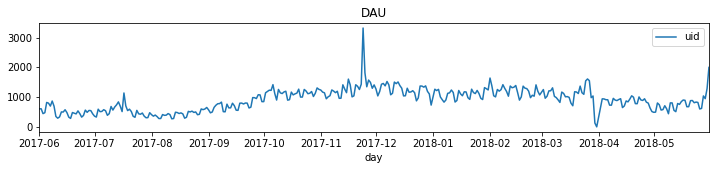

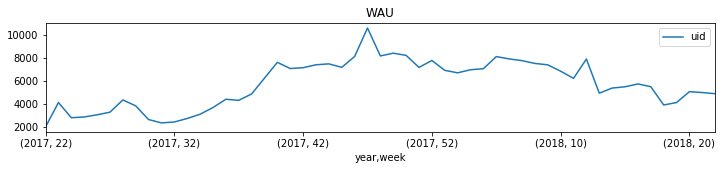

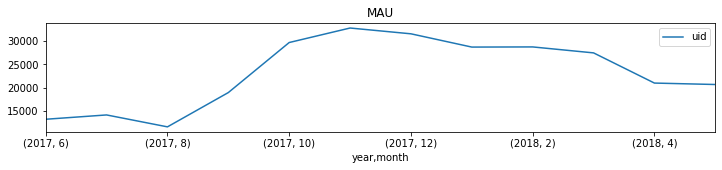

In [15]:
dau_total_graph = visits.groupby('day').agg({'uid':'nunique'}).plot(kind='line', figsize=(12,2))
plt.title('DAU')
wau_total_graph = visits.groupby(['year','week']).agg({'uid':'nunique'}).plot(kind='line', figsize=(12,2))
plt.title('WAU')
mau_total_graph = visits.groupby(['year','month']).agg({'uid':'nunique'}).plot(kind='line', figsize=(12,2))
plt.title('MAU')
plt.show()

На графиках заметна **сезонность** - летом пользователей становится заметно меньше по сравнению с осенью-зимой. Это можно связать с тем, что все новые мероприятия выходит в конце года, а лето скорее "мертвый" сезон.  
Однако можно заметить положительный тренд, что пользователей летом 18 года было чуть больше по сравнению с летом 17-го.

In [16]:
# рассчитаем значения стики-фактора
sticky_wau = dau_total / wau_total * 100
sticky_wau

uid    15.884409
dtype: float64

In [17]:
# рассчитаем значения стики-фактора
sticky_mau = dau_total / mau_total * 100
sticky_mau

uid    3.90897
dtype: float64

В день сервисом пользуется 907 пользователей, в неделю 5716, а в месяц 23228.   
Полученные стики-факторы указывают на то, что скорее не всё в сервисе нравится пользователям. 

In [18]:
# построим dau,wau mau в разрезе девайсов
for column in visits['device'].unique():
    dau_column = visits[visits['device']==column].groupby('day').agg({'uid':'nunique'}).mean()
    wau_column = visits[visits['device']==column].groupby(['year','week']).agg({'uid':'nunique'}).mean()
    mau_column = visits[visits['device']==column].groupby(['year','month']).agg({'uid':'nunique'}).mean()
    print('dau',column,'=',int(dau_column))
    print('wau',column,'=',int(wau_column))
    print('mau',column,'=',int(mau_column))
    print()

dau touch = 252
wau touch = 1634
mau touch = 6825

dau desktop = 659
wau desktop = 4129
mau desktop = 16724



In [19]:
# построим dau,wau mau в разрезе источников
for column in visits['source_id'].unique():
    dau_column = visits[visits['source_id']==column].groupby('day').agg({'uid':'nunique'}).mean()
    wau_column = visits[visits['source_id']==column].groupby(['year','week']).agg({'uid':'nunique'}).mean()
    mau_column = visits[visits['source_id']==column].groupby(['year','month']).agg({'uid':'nunique'}).mean()
    print('dau',column,'=',int(dau_column))
    print('wau',column,'=',int(wau_column))
    print('mau',column,'=',int(mau_column))
    print()

dau 4 = 275
wau 4 = 1829
mau 4 = 7765

dau 2 = 120
wau 2 = 715
mau 2 = 2752

dau 5 = 175
wau 5 = 1167
mau 5 = 5017

dau 9 = 36
wau 9 = 238
mau 9 = 987

dau 3 = 232
wau 3 = 1565
mau 3 = 6758

dau 1 = 80
wau 1 = 463
mau 1 = 1818

dau 10 = 26
wau 10 = 166
mau 10 = 707

dau 7 = 1
wau 7 = 1
mau 7 = 2

dau 6 = 1
wau 6 = 1
mau 6 = 1



Большинство пользователей посещает сервис с копьютера/ноутбука. Рекламные источники, лидирующие по привлечению пользователей: 4, 3 и 5.

<a id='5-bullet'></a>
#### 2.2. Сколько сессий в день?

In [20]:
# посчитаем сколько сессий приходится на каждый день 
sessions_per_user=visits.groupby('day').agg({'uid':['count','nunique']})
sessions_per_user.columns=['n_sessions','n_users']
sessions_per_user['sessions_per_user']=sessions_per_user['n_sessions']/sessions_per_user['n_users']
print('В среднем в день приходится {:.2f}'.format(sessions_per_user['sessions_per_user'].mean()), 'сессий')

В среднем в день приходится 1.08 сессий


In [21]:
# посчитаем сколько сессий приходится на каждый день в зависимости от девайса
for column in visits['device'].unique():
    sessions_per_user=visits[visits['device']==column].groupby('day').agg({'uid':['count','nunique']})
    sessions_per_user.columns=['n_sessions','n_users']
    sessions_per_user['sessions_per_user']=sessions_per_user['n_sessions']/sessions_per_user['n_users']
    print('В среднем в день на',column, 'приходится {:.2f}'.format(sessions_per_user['sessions_per_user'].mean()), 'сессий')

В среднем в день на touch приходится 1.05 сессий
В среднем в день на desktop приходится 1.09 сессий


In [22]:
# посчитаем сколько сессий приходится на каждый день в зависимости от рекламного источника
for column in visits['source_id'].unique():
    sessions_per_user=visits[visits['source_id']==column].groupby('day').agg({'uid':['count','nunique']})
    sessions_per_user.columns=['n_sessions','n_users']
    sessions_per_user['sessions_per_user']=sessions_per_user['n_sessions']/sessions_per_user['n_users']
    print('В среднем в день на пользователей с рекламным источником',column, 'приходится {:.2f}'.format(sessions_per_user['sessions_per_user'].mean()), 'сессий')

В среднем в день на пользователей с рекламным источником 4 приходится 1.02 сессий
В среднем в день на пользователей с рекламным источником 2 приходится 1.08 сессий
В среднем в день на пользователей с рекламным источником 5 приходится 1.05 сессий
В среднем в день на пользователей с рекламным источником 9 приходится 1.01 сессий
В среднем в день на пользователей с рекламным источником 3 приходится 1.01 сессий
В среднем в день на пользователей с рекламным источником 1 приходится 1.15 сессий
В среднем в день на пользователей с рекламным источником 10 приходится 1.05 сессий
В среднем в день на пользователей с рекламным источником 7 приходится 1.00 сессий
В среднем в день на пользователей с рекламным источником 6 приходится 1.00 сессий


Пользователи с десктопа заходят чуть чаще, чем с touch.  
Рекламный источник под идентификатором 1 побуждает людей сделать повторную сессию чаще остальных. 

<a id='6-bullet'></a>
#### 2.3. Сколько длится одна сессия?

In [23]:
# Посчитаем длительность 
visits['session_duration_sec']=(visits['end_ts']-visits['start_ts']).dt.seconds

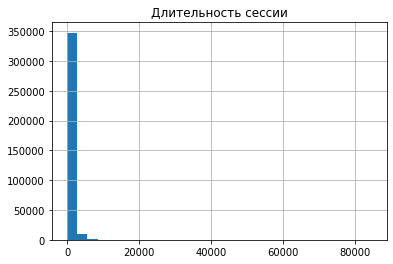

In [24]:
# Посмотрим на распределение длительности сессии
visits['session_duration_sec'].hist(bins=30)
plt.title('Длительность сессии')
plt.show()

Как можно заметить наблюдаем ненормальное распредение, соответственно будем использовать медиану в качестве меры среднего.

In [25]:
# посчитаем среднюю продолжительность сессии
print('В среднем сессия длится {:.1f}'.format(visits['session_duration_sec'].describe()[5]), 'секунд')

В среднем сессия длится 300.0 секунд


In [26]:
# посчитаем среднюю продолжительность сессии в зависимости от девайса
for column in visits['device'].unique():
    duration=(visits[visits['device']==column]['end_ts']-visits[visits['device']==column]['start_ts']).dt.seconds
    print('В среднем на',column,'сессия длится {:.1f}'.format(duration.describe()[5]),'секунд')

В среднем на touch сессия длится 180.0 секунд
В среднем на desktop сессия длится 360.0 секунд


In [27]:
# посчитаем среднюю продолжительность сессии в зависимости от рекламного источника
for column in visits['source_id'].unique():
    duration=(visits[visits['source_id']==column]['end_ts']-visits[visits['source_id']==column]['start_ts']).dt.seconds
    print('В среднем с рекламным источником',column,'сессия длится {:.1f}'.format(duration.describe()[5]),'секунд')

В среднем с рекламным источником 4 сессия длится 240.0 секунд
В среднем с рекламным источником 2 сессия длится 420.0 секунд
В среднем с рекламным источником 5 сессия длится 240.0 секунд
В среднем с рекламным источником 9 сессия длится 240.0 секунд
В среднем с рекламным источником 3 сессия длится 240.0 секунд
В среднем с рекламным источником 1 сессия длится 600.0 секунд
В среднем с рекламным источником 10 сессия длится 300.0 секунд
В среднем с рекламным источником 7 сессия длится 180.0 секунд
В среднем с рекламным источником 6 сессия длится 420.0 секунд


На десктопе сессия в среднем длиннее в 2 раза по сравнению с touch.
Пользователи, привлеченные с помощью рекламных источников с идентификаторами 1, 2 и 6, демонстрируют самые длинные средние сессии.

<a id='7-bullet'></a>
#### 2.4. Как часто люди возвращаются?

In [28]:
# найдем дату, когда пользователь впервые проявил активность
first_activity_date=visits.groupby(['uid'])['start_ts'].min()
first_activity_date.name='first_activity_date'
visits=visits.join(first_activity_date,on='uid')

visits['first_activity_date']=pd.to_datetime(visits['first_activity_date'])

In [29]:
# выделим в датах первой активности и активности месяцы 
visits['first_activity_month']=visits['first_activity_date'].astype('datetime64[M]')
visits['activity_month']=visits['start_ts'].astype('datetime64[M]')

In [30]:
# рассчитаем lifetime 
visits['cohort_lifetime']=visits['activity_month']-visits['first_activity_month']
visits['cohort_lifetime']=visits['cohort_lifetime']/np.timedelta64(1,'M')
visits['cohort_lifetime']=visits['cohort_lifetime'].round().astype('int')

In [31]:
# посчитаем для каждой когорты количество активных пользователей на определенный "месяц жизни"
cohorts = visits.groupby(['first_activity_month', 'cohort_lifetime']).agg({'uid':'nunique'}).reset_index()

In [32]:
# найдем исходное количество пользователей в когорте
initial_users_count = cohorts[cohorts['cohort_lifetime']==0][['first_activity_month','uid']]
initial_users_count=initial_users_count.rename(columns={'uid':'cohort_users'})

In [33]:
# объединим данные по когортам с исходным количеством пользователей в когорте
cohorts = cohorts.merge(initial_users_count,on='first_activity_month')

In [34]:
# рассчитаем retention rate 
cohorts['retention']=cohorts['uid']/cohorts['cohort_users']

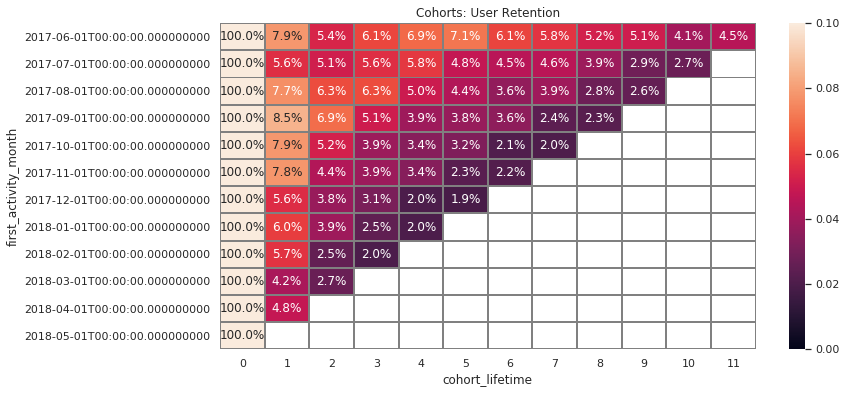

In [35]:
# построим сводную таблицу
retention_pivot=cohorts.pivot_table(index='first_activity_month',columns='cohort_lifetime', values='retention', aggfunc='sum')

# построим тепловую карту
sns.set(style='white')
plt.figure(figsize=(12, 6))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray', vmin=0, vmax=0.1); 

Retention Rate в первый месяц убывает по когортам с течением времени. Если для когорты пользователей, пришедших в сентябре 2017г., retention rate составил 8.5%, то для пользователей, пришедших в марте 2018 - уже 4.2%. Так, за  полгода коэффициент удержания упал на 4.3%. Это говорит о том, что с каждой новой когортой поведение пользователей меняется. Возможно были выбраны неэффективные источники привлечения траффика.

##### Продажные метрики:

<a id='8-bullet'></a>
#### 2.5. Когда люди начинают покупать?

In [36]:
# найдем даты первых посещений
first_visits = visits.sort_values(by=['uid','start_ts']).groupby('uid').agg({'start_ts':'min'})

# найдем даты первых покупок
first_orders = orders.sort_values(by=['uid','buy_ts']).groupby('uid').agg({'buy_ts':'min'})

# объединим даты первых посещений с первыми покупками 
total_visits = first_visits.merge(first_orders, on='uid')

# найдем через сколько по времени люди совершают первую покуку после первого посещения
total_visits['delta']=(total_visits['buy_ts']-total_visits['start_ts'])

In [37]:
total_visits.describe().T

,count,mean,std,min,25%,50%,75%,max
delta,36523,16 days 21:40:10.550064,47 days 01:44:46.481416,0 days,00:04:00,00:16:00,2 days 00:17:00,363 days 07:04:00


Можно считать, что в среднем от первого захода на ресурс до первой покупки проходит 16 минут. 

<a id='9-bullet'></a>
#### 2.6. Сколько раз покупают за период?

In [38]:
# приводим к формату даты
orders['buy_date']=orders['buy_ts'].dt.date
orders['buy_date']=orders['buy_ts'].dt.strftime('%Y-%m') 

In [39]:
# посчитаем сколько заказов в среднем приходится на пользователей
orders_per_user=orders.groupby('buy_date').agg({'uid':['count','nunique']})
orders_per_user.columns=['n_orders','n_users']
orders_per_user['orders_per_user']=orders_per_user['n_orders']/orders_per_user['n_users']
print('В среднем в месяц пользователи делают заказ {:.2f}'.format(orders_per_user['orders_per_user'].mean()), 'раза')

В среднем в месяц пользователи делают заказ 1.21 раза


Чуть больше одного заказа в месяц говорит нам о том, что в 2017-2018гг. большинство пользователей Яндекс.Афиши посещало всего лишь **одно мероприятие в месяц** (интересно посмотреть на возрастной профиль аудитории?). Соответственно более активная аудитория, которая посещает различные мероприятия, например, каждую неделю пользовалась каким-то другим сервисом при покупке билетов (или не покупала билеты онлайн?). Может быть она просто не знала о Яндекс.Афише в 2017-2018гг.?  

<a id='10-bullet'></a>
#### 2.7. Какой средний чек?

In [40]:
# посчитаем средний чек
average_revenue=orders.groupby('buy_date').agg({'uid':'count','revenue':'sum'})
average_revenue.columns=['n_orders','total_revenue']
average_revenue['average_revenue']=average_revenue['total_revenue']/average_revenue['n_orders']
print('В целом, средний чек составляет {:.2f}'.format(average_revenue['average_revenue'].mean()))

В целом, средний чек составляет 4.84


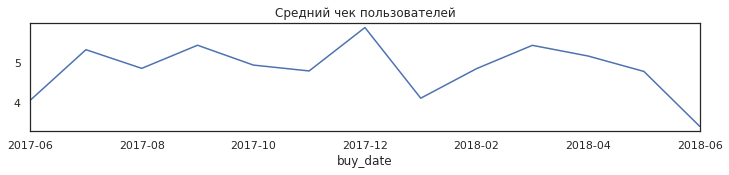

In [41]:
# посмотрим на средний чек в динамике
average_revenue['average_revenue'].plot(kind='line', figsize=(12,2))
plt.title('Средний чек пользователей')
plt.show()

В целом, средний чек пользователей находится на уровне **4.84**.   
Из графика выше можно заметить, что **самый большой чек был в декабре 2017**, а **самый низкий в июне 2018**. 
Скорее всего это можно связать с сезонностью сферы мероприятий, потому что в прошлом году самый низкий средний чек также был в июне 2017.  
Так, лето обычно "мертвый" сезон для сферы мероприятий, поэтому можно попробовать повысить продажи летом за счет промо-акций.  
Осень-зима представляется основным периодом - большинство новых мероприятий проходит именно в этот период. 

<a id='11-bullet'></a>
#### 2.8. Сколько денег приносят? (LTV)

In [42]:
# выделим месяц из дат в таблицах с заказа
orders['order_month']=orders['buy_ts'].astype('datetime64[M]')
costs['month']=costs['dt'].astype('datetime64[M]')

In [43]:
# получим первый месяц покупки каждого покупателя
first_orders=orders.groupby('uid').agg({'order_month':'min'}).reset_index()
first_orders.columns=['uid','first_order_month']

In [44]:
# посчитаем количество новых покупателей за каждый месяц
cohort_sizes=first_orders.groupby('first_order_month').agg({'uid':'nunique'}).reset_index()
cohort_sizes.columns=['first_order_month','n_buyers']

In [45]:
# добавим месяц первой покупки каждого покупателя в таблицу с заказами
orders_new = pd.merge(orders,first_orders,on='uid')

In [46]:
# сгруппируем таблицу заказов по месяцу первой покупки и месяцу каждого заказа и сложим выручку
cohorts = orders_new.groupby(['first_order_month','order_month']).agg({'revenue':'sum'}).reset_index()

In [47]:
# добавим в таблицу cohorts данные о том, сколько людей первый раз совершили покупку в каждый месяц
report=pd.merge(cohorts,cohort_sizes,on='first_order_month')

In [48]:
report

,first_order_month,order_month,revenue,n_buyers
0,2017-06-01,2017-06-01,9557.49,2023
1,2017-06-01,2017-07-01,981.82,2023
2,2017-06-01,2017-08-01,885.34,2023
3,2017-06-01,2017-09-01,1931.30,2023
4,2017-06-01,2017-10-01,2068.58,2023
...,...,...,...,...
74,2018-03-01,2018-05-01,1114.87,3533
75,2018-04-01,2018-04-01,10600.69,2276
76,2018-04-01,2018-05-01,1209.92,2276
77,2018-05-01,2018-05-01,13925.76,2988


In [49]:
# найдем возраст когорт
report['age']=(report['order_month']-report['first_order_month']) / np.timedelta64(1, 'M')
report['age']=report['age'].round().astype(int)

In [50]:
# найдем валовую прибыль
margin_rate = 1
report['gp']=report['revenue'] * margin_rate

In [51]:
# найдем LTV
report['ltv']=report['gp']/report['n_buyers']

In [52]:
# визуализируем когорты в виде сводной таблицы
output = report.pivot_table(
        index='first_order_month',
        columns='age',
        values='ltv',
        aggfunc='mean').round(2).cumsum(axis=1)

output.append(pd.DataFrame(output.mean().to_frame(name='Total')).T).round(2).fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
2017-06-01 00:00:00,4.72,5.21,5.65,6.6,7.62,8.36,9.31,9.89,10.44,11.05,11.62,11.88
2017-07-01 00:00:00,6.01,6.35,6.97,7.33,7.51,7.67,7.79,7.93,8.09,8.24,8.4,
2017-08-01 00:00:00,5.28,5.75,6.21,6.6,7.09,7.37,7.58,7.99,8.28,8.47,,
2017-09-01 00:00:00,5.64,6.76,7.28,11.26,11.66,12.31,13.01,13.25,13.43,,,
2017-10-01 00:00:00,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,,,,
2017-11-01 00:00:00,5.15,5.55,5.75,6.07,6.22,6.27,6.38,,,,,
2017-12-01 00:00:00,4.74,5,5.93,7,7.31,7.65,,,,,,
2018-01-01 00:00:00,4.14,4.43,4.73,4.87,4.93,,,,,,,
2018-02-01 00:00:00,4.16,4.44,4.52,4.59,,,,,,,,
2018-03-01 00:00:00,4.84,5.14,5.46,,,,,,,,,


В среднем каждый пользователь за год "жизни" приносит 11.88 выручки. 

##### Маркетинговые метрики:

<a id='12-bullet'></a>
#### 2.9. Сколько денег потратили? 

In [53]:
# посчитаем суммарные маркетинговые расходы на каждый месяц - по времени
monthly_costs=costs.groupby('month').sum().reset_index()
monthly_costs=monthly_costs.drop('source_id',axis=1)
monthly_costs

,month,costs
0,2017-06-01,18015.00
1,2017-07-01,18240.59
2,2017-08-01,14790.54
3,2017-09-01,24368.91
4,2017-10-01,36322.88
5,2017-11-01,37907.88
6,2017-12-01,38315.35
7,2018-01-01,33518.52
8,2018-02-01,32723.03
9,2018-03-01,30415.27


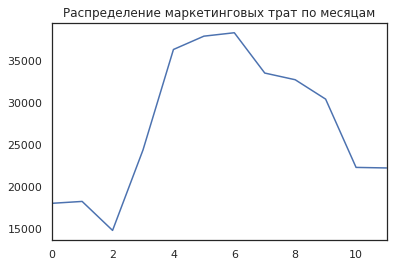

In [54]:
# посмотрим на распределение месячных маркетинговых трат
monthly_costs['costs'].plot()
plt.title('Распределение маркетинговых трат по месяцам')
plt.show()

In [55]:
# посмотрим маркетинговые расходы на каждый источник
source_costs=costs.groupby(['source_id']).sum()
source_costs

,costs
source_id,
1,20833.27
2,42806.04
3,141321.63
4,61073.60
5,51757.10
9,5517.49
10,5822.49


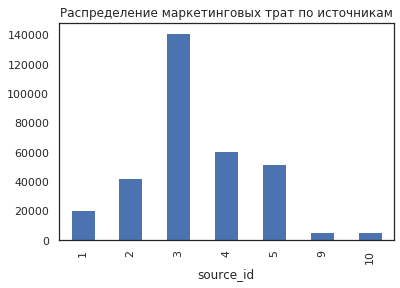

In [56]:
# посмотрим на распределение маркетинговых трат по источникам
source_costs['costs'].plot(kind='bar')
plt.title('Распределение маркетинговых трат по источникам')
plt.show()

In [57]:
print('Суммарные траты на маркетинг составили',monthly_costs['costs'].sum().round(2))

Суммарные траты на маркетинг составили 329131.62


<a id='13-bullet'></a>
#### 2.10. Сколько стоило привлечение одного покупателя из каждого источника?

In [58]:
# добавим к отчету данные о расходах и посчитаем cac
report_new = pd.merge(report, monthly_costs, left_on='first_order_month', right_on='month')
report_new['cac']=report_new['costs']/report_new['n_buyers']
report_new.head()

,first_order_month,order_month,revenue,n_buyers,age,gp,ltv,month,costs,cac
0,2017-06-01,2017-06-01,9557.49,2023,0,9557.49,4.724414,2017-06-01,18015.0,8.905091
1,2017-06-01,2017-07-01,981.82,2023,1,981.82,0.485329,2017-06-01,18015.0,8.905091
2,2017-06-01,2017-08-01,885.34,2023,2,885.34,0.437637,2017-06-01,18015.0,8.905091
3,2017-06-01,2017-09-01,1931.30,2023,3,1931.30,0.954671,2017-06-01,18015.0,8.905091
4,2017-06-01,2017-10-01,2068.58,2023,4,2068.58,1.022531,2017-06-01,18015.0,8.905091


Далее, для дальнейших расчетов создадим профиль пользователей, содержащий устройство, источник и стоимость привлечения. На основе этого профиля будем расчитывать ROI по устройствам и источникам.

In [59]:
costs=costs.rename(columns={'dt':'obtain_date'})

In [60]:
# строим профили пользователей
users=(visits.sort_values(by=['uid','start_ts']).groupby('uid')
             .agg({'start_ts':'first','source_id':'first','device':'first'})
             .rename(columns={'start_ts':'obtain_ts'}))
users['obtain_date']=users['obtain_ts'].dt.date
users['obtain_month']=users['obtain_ts'].astype('datetime64[M]')
users=(users.reset_index().set_index(['source_id','obtain_date'])
            .join(costs.set_index(['source_id','obtain_date']), how='left'))


# добавляем стоимость приобретения индвидуального пользователя
user_cost=(users.groupby(['source_id','obtain_date']).agg({'device':'count','costs':'max'})
                .rename(columns={'device':'users'}))
user_cost['obtain_cost']=user_cost['costs']/user_cost['users']

# прикрепляем цену к каждому пользователю
users=users.join(user_cost[['obtain_cost']], how = 'left')
users=users.reset_index().set_index('uid')[['obtain_ts','obtain_date','obtain_month','source_id','device','obtain_cost']]
users.head()

,obtain_ts,obtain_date,obtain_month,source_id,device,obtain_cost
uid,,,,,,
469568501030474895,2017-06-01 05:30:00,2017-06-01,2017-06-01,1,desktop,1.6
618675438905551322,2017-06-01 02:37:00,2017-06-01,2017-06-01,1,touch,1.6
1074355127080856382,2017-06-01 09:21:00,2017-06-01,2017-06-01,1,desktop,1.6
1292867924428534308,2017-06-01 12:53:00,2017-06-01,2017-06-01,1,desktop,1.6
1548840741623289234,2017-06-01 01:18:00,2017-06-01,2017-06-01,1,desktop,1.6


<a id='14-bullet'></a>
#### 2.11. На сколько окупились расходы? (ROI)

In [61]:
# посчитаем romi в целом
report_new['romi']=report_new['ltv']/report_new['cac']

In [62]:
# построим сводную таблицу
output_new=report_new.pivot_table(
        index='first_order_month',
        columns='age',
        values='romi',
        aggfunc='mean').cumsum(axis=1).round(2)
output_new.append(pd.DataFrame(output_new.mean().to_frame(name='Total')).T).round(2).fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
2017-06-01 00:00:00,0.53,0.59,0.63,0.74,0.86,0.94,1.05,1.11,1.17,1.24,1.31,1.33
2017-07-01 00:00:00,0.63,0.67,0.73,0.77,0.79,0.81,0.82,0.84,0.85,0.87,0.88,
2017-08-01 00:00:00,0.49,0.53,0.57,0.61,0.66,0.68,0.7,0.74,0.77,0.78,,
2017-09-01 00:00:00,0.60,0.72,0.77,1.19,1.23,1.3,1.38,1.4,1.42,,,
2017-10-01 00:00:00,0.60,0.66,0.68,0.7,0.72,0.74,0.75,0.76,,,,
2017-11-01 00:00:00,0.55,0.6,0.62,0.65,0.67,0.68,0.69,,,,,
2017-12-01 00:00:00,0.54,0.57,0.68,0.8,0.84,0.87,,,,,,
2018-01-01 00:00:00,0.42,0.45,0.48,0.49,0.5,,,,,,,
2018-02-01 00:00:00,0.46,0.49,0.5,0.51,,,,,,,,
2018-03-01 00:00:00,0.56,0.6,0.63,,,,,,,,,


В среднем когорты окупаются к концу 7 месяца.

Далее, посчитаем Romi относительно устройств:

In [63]:
dimensions=['device']

# создадим когорты по устройствам, используя ранее созданный профиль пользователей
cohorts_devices=(users.groupby(dimensions)
              .agg({'source_id':'count','obtain_cost':'sum'}).round(2)
              .rename(columns={'source_id':'cohort_size'}))

In [64]:
# считаем LTV
device_ltv=orders.set_index('uid').join(users,how='left')[['obtain_month','source_id','device','order_month','revenue']]
device_ltv['order_month']=pd.to_datetime(device_ltv['order_month'])
device_ltv['age']=((device_ltv['order_month']-device_ltv['obtain_month'])/np.timedelta64(1,'M')).round().astype('int')

device_ltv=device_ltv.groupby(dimensions + ['age']).agg({'revenue':'sum'})

device_ltv=device_ltv.pivot_table(index='device', columns='age',values='revenue',aggfunc='sum')
device_ltv=device_ltv.cumsum(axis=1)
device_ltv=cohorts_devices[['cohort_size']].join(device_ltv)
device_ltv=device_ltv.div(device_ltv['cohort_size'],axis=0).drop(columns=['cohort_size']).round(2)

In [65]:
device_ltv

,0,1,2,3,4,5,6,7,8,9,10,11
device,,,,,,,,,,,,
desktop,0.73,0.84,0.92,1.07,1.13,1.18,1.22,1.25,1.27,1.29,1.3,1.31
touch,0.37,0.45,0.48,0.50,0.52,0.54,0.55,0.57,0.58,0.60,0.6,0.60


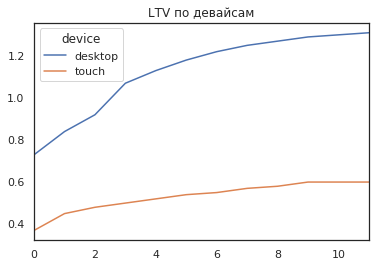

In [66]:
device_ltv.T.plot()
plt.title('LTV по девайсам')
plt.show()

In [67]:
# добавим в когорты по девайсам CAC
cohorts_devices['cac']=cohorts_devices['obtain_cost']/cohorts_devices['cohort_size']

In [68]:
cohorts_devices

,cohort_size,obtain_cost,cac
device,,,
desktop,160795,235065.75,1.461897
touch,67374,94000.73,1.395208


In [69]:
# посчитаем romi в разрезе устройств
device_romi=device_ltv.merge(cohorts_devices,on='device',how='left')

device_romi=device_romi.div(cohorts_devices['cac'],axis=0).drop(columns=['cohort_size','cac','obtain_cost']).round(2)

In [70]:
device_romi

,0,1,2,3,4,5,6,7,8,9,10,11
device,,,,,,,,,,,,
desktop,0.50,0.57,0.63,0.73,0.77,0.81,0.83,0.86,0.87,0.88,0.89,0.90
touch,0.27,0.32,0.34,0.36,0.37,0.39,0.39,0.41,0.42,0.43,0.43,0.43


На десктопе окупаемость почти происходит только на 11 месяце жизни, на touch - привлечение пользователей не окупается.

In [71]:
dimensions2=['source_id']

# создадим когорты по рекламным источникам
cohorts_sources=(users.groupby(dimensions2)
              .agg({'source_id':'count','obtain_cost':'sum'}).round(2)
              .rename(columns={'source_id':'cohort_size'}))

In [72]:
# считаем ltv
sources_ltv=orders.set_index('uid').join(users,how='left')[['obtain_month','source_id','device','order_month','revenue']]
sources_ltv['order_month']=pd.to_datetime(sources_ltv['order_month'])
sources_ltv['age']=((sources_ltv['order_month']-sources_ltv['obtain_month'])/np.timedelta64(1,'M')).round().astype('int')

sources_ltv=sources_ltv.groupby(dimensions2 + ['age']).agg({'revenue':'sum'})

sources_ltv=sources_ltv.pivot_table(index='source_id', columns='age',values='revenue',aggfunc='sum')
sources_ltv=sources_ltv.cumsum(axis=1)
sources_ltv=cohorts_sources[['cohort_size']].join(sources_ltv)
sources_ltv=sources_ltv.div(sources_ltv['cohort_size'],axis=0).drop(columns=['cohort_size']).round(2)

In [73]:
sources_ltv

,0,1,2,3,4,5,6,7,8,9,10,11
source_id,,,,,,,,,,,,
1,1.53,1.81,2.00,2.29,2.47,2.59,2.68,2.92,3.05,3.14,3.23,3.28
2,1.02,1.36,1.70,2.07,2.25,2.39,2.46,2.51,2.55,2.60,2.64,2.66
3,0.57,0.66,0.70,0.73,0.76,0.78,0.80,0.81,0.81,0.82,0.82,0.82
4,0.52,0.58,0.61,0.64,0.66,0.69,0.72,0.73,0.74,0.76,0.77,0.78
5,0.58,0.65,0.70,0.92,0.95,1.00,1.02,1.04,1.05,1.06,1.07,1.07
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.37,0.47,0.55,0.63,0.70,0.74,0.78,0.81,0.86,0.88,0.89,0.89
10,0.51,0.56,0.58,0.59,0.61,0.62,0.64,0.64,0.64,0.64,0.64,0.64


In [74]:
# добавим в когорты по рекламным источникам CAC
cohorts_sources['cac']=cohorts_sources['obtain_cost']/cohorts_sources['cohort_size']

In [75]:
# посчитаем Romi в разрезе рекламных источников
sources_romi=sources_ltv.merge(cohorts_sources,on='source_id',how='left')

sources_romi=sources_romi.div(sources_romi['cac'],axis=0).drop(columns=['cohort_size','cac','obtain_cost']).round(2)

In [76]:
sources_romi

,0,1,2,3,4,5,6,7,8,9,10,11
source_id,,,,,,,,,,,,
1,0.70,0.82,0.91,1.04,1.12,1.18,1.22,1.33,1.39,1.43,1.47,1.49
2,0.42,0.56,0.70,0.85,0.93,0.98,1.01,1.03,1.05,1.07,1.09,1.09
3,0.27,0.31,0.33,0.34,0.36,0.36,0.37,0.38,0.38,0.38,0.38,0.38
4,0.62,0.69,0.72,0.76,0.78,0.82,0.85,0.86,0.88,0.90,0.91,0.92
5,0.55,0.62,0.67,0.88,0.90,0.95,0.97,0.99,1.00,1.01,1.02,1.02
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,inf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.44,0.56,0.65,0.74,0.83,0.87,0.92,0.96,1.02,1.04,1.05,1.05
10,0.60,0.66,0.69,0.70,0.72,0.74,0.76,0.76,0.76,0.76,0.76,0.76


Самые быстро окупаемые рекламные источники - 1 и 2

### Шаг 3. Общий вывод

<a id='15-bullet'></a>
#### 3.1. Рекомендации маркетологам

Лучше стараться привлекать новых десктопных пользователей - пользователи touch **не окупаются даже за год "жизни"**. Бюджет необходимо разделить между **1, 2 и 5** рекламными источниками, распределив большую часть между 1 и 2 - они достаточно быстро окупаются, а также пользователи пришедшие из этих источников **имеют большую длительность и частоту сессий**. 